In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas
import numpy as np
from sklearn import tree
from sklearn import svm
import sklearn.linear_model as lm
from sklearn import preprocessing, model_selection, pipeline
from sklearn import metrics
from sklearn.inspection import permutation_importance



from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets



import sys
sys.path.append('C://Program Files//Graphviz//bin')



np.set_printoptions(precision=3)
pandas.set_option("display.precision", 3)


%matplotlib inline

In [36]:
np.set_printoptions(precision=3)
pandas.set_option("display.precision", 3)



classification_scores = ['accuracy','precision_weighted',
                         'recall_weighted', 'roc_auc_ovr_weighted',
                         'f1_weighted']

%matplotlib inline

<font size="6"><div align="center"><span style="color:blue">Leitura e entendimento da base</span></div></font>

In [37]:
df_churn = pandas.read_csv('churn.csv')
churn_target_col = 'churn_risk_score'
churn_label_map = df_churn[['churn_risk_score', 'churn_risk_score']].drop_duplicates()

In [38]:
drop_cols = ['churn_risk_score']
df_churn.head()

,Unnamed: 0,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,0,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,1,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,0
2,2,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1
3,3,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,1
4,4,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,1


In [39]:
print(df_churn.shape)
count_nan_in_df = df_churn.isnull().sum()
print (count_nan_in_df)

(36992, 24)
Unnamed: 0                         0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64


In [40]:
df_churn.dtypes

Unnamed: 0                        int64
age                               int64
gender                           object
security_no                      object
region_category                  object
membership_category              object
joining_date                     object
joined_through_referral          object
referral_id                      object
preferred_offer_types            object
medium_of_operation              object
internet_option                  object
last_visit_time                  object
days_since_last_login             int64
avg_time_spent                  float64
avg_transaction_value           float64
avg_frequency_login_days         object
points_in_wallet                float64
used_special_discount            object
offer_application_preference     object
past_complaint                   object
complaint_status                 object
feedback                         object
churn_risk_score                  int64
dtype: object

In [41]:
df_churn['gender'].value_counts()

F          18490
M          18443
Unknown       59
Name: gender, dtype: int64

In [42]:
df_churn = df_churn[df_churn.gender != 'Unknown']

In [43]:
df_churn['region_category'].value_counts()


Town       14099
City       12721
Village     4693
Name: region_category, dtype: int64

In [44]:
#df_churn.fillna(df_churn['region_category']('Vazio')) #df_churn = df_churn.dropna(subset=['region_category'])
df_churn['region_category'] =  df_churn['region_category'].fillna('Vazio')

In [45]:
df_churn['membership_category'].value_counts()

Basic Membership       7710
No Membership          7681
Gold Membership        6785
Silver Membership      5979
Premium Membership     4444
Platinum Membership    4334
Name: membership_category, dtype: int64

In [46]:
df_churn['joined_through_referral'].value_counts()

No     15816
Yes    15689
?       5428
Name: joined_through_referral, dtype: int64

In [47]:
#df_churn["joined_through_referral"].replace({"?": "No"}, inplace=True)

In [48]:
df_churn['preferred_offer_types'].value_counts()

Gift Vouchers/Coupons       12322
Credit/Debit Card Offers    12256
Without Offers              12068
Name: preferred_offer_types, dtype: int64

In [49]:
#df_churn = df_churn.dropna(subset=['preferred_offer_types'])
df_churn['preferred_offer_types'] =  df_churn['preferred_offer_types'].fillna('Vazio')

In [50]:
df_churn['medium_of_operation'].value_counts()

Desktop       13893
Smartphone    13855
?              5379
Both           3806
Name: medium_of_operation, dtype: int64

In [51]:
df_churn['internet_option'].value_counts()

Wi-Fi          12393
Mobile_Data    12327
Fiber_Optic    12213
Name: internet_option, dtype: int64

In [52]:
df_churn['last_visit_time'].value_counts()

07:56:41    6
21:12:56    5
22:31:06    5
17:11:53    5
12:30:02    5
           ..
12:56:50    1
05:29:14    1
10:33:06    1
03:23:09    1
01:39:52    1
Name: last_visit_time, Length: 30058, dtype: int64

In [53]:
df_churn['avg_frequency_login_days'].value_counts()

Error                  3518
13.0                   1392
8.0                    1360
19.0                   1360
14.0                   1351
                       ... 
28.191570401129514        1
41.73357294995208         1
-11.515939810499656       1
45.71683637272365         1
27.8399274405269          1
Name: avg_frequency_login_days, Length: 1650, dtype: int64

In [54]:
df_churn['used_special_discount'].value_counts()

Yes    20312
No     16621
Name: used_special_discount, dtype: int64

In [55]:
 df_churn['offer_application_preference'].value_counts()

Yes    20405
No     16528
Name: offer_application_preference, dtype: int64

In [56]:
df_churn['past_complaint'].value_counts()

No     18573
Yes    18360
Name: past_complaint, dtype: int64

In [57]:
df_churn['complaint_status'].value_counts()

Not Applicable              18573
Unsolved                     4634
Solved                       4611
Solved in Follow-up          4571
No Information Available     4544
Name: complaint_status, dtype: int64

In [58]:
df_churn['feedback'].value_counts()

Poor Product Quality        6339
No reason specified         6282
Too many ads                6270
Poor Website                6261
Poor Customer Service       6238
Reasonable Price            1417
User Friendly Website       1390
Products always in Stock    1379
Quality Customer Care       1357
Name: feedback, dtype: int64

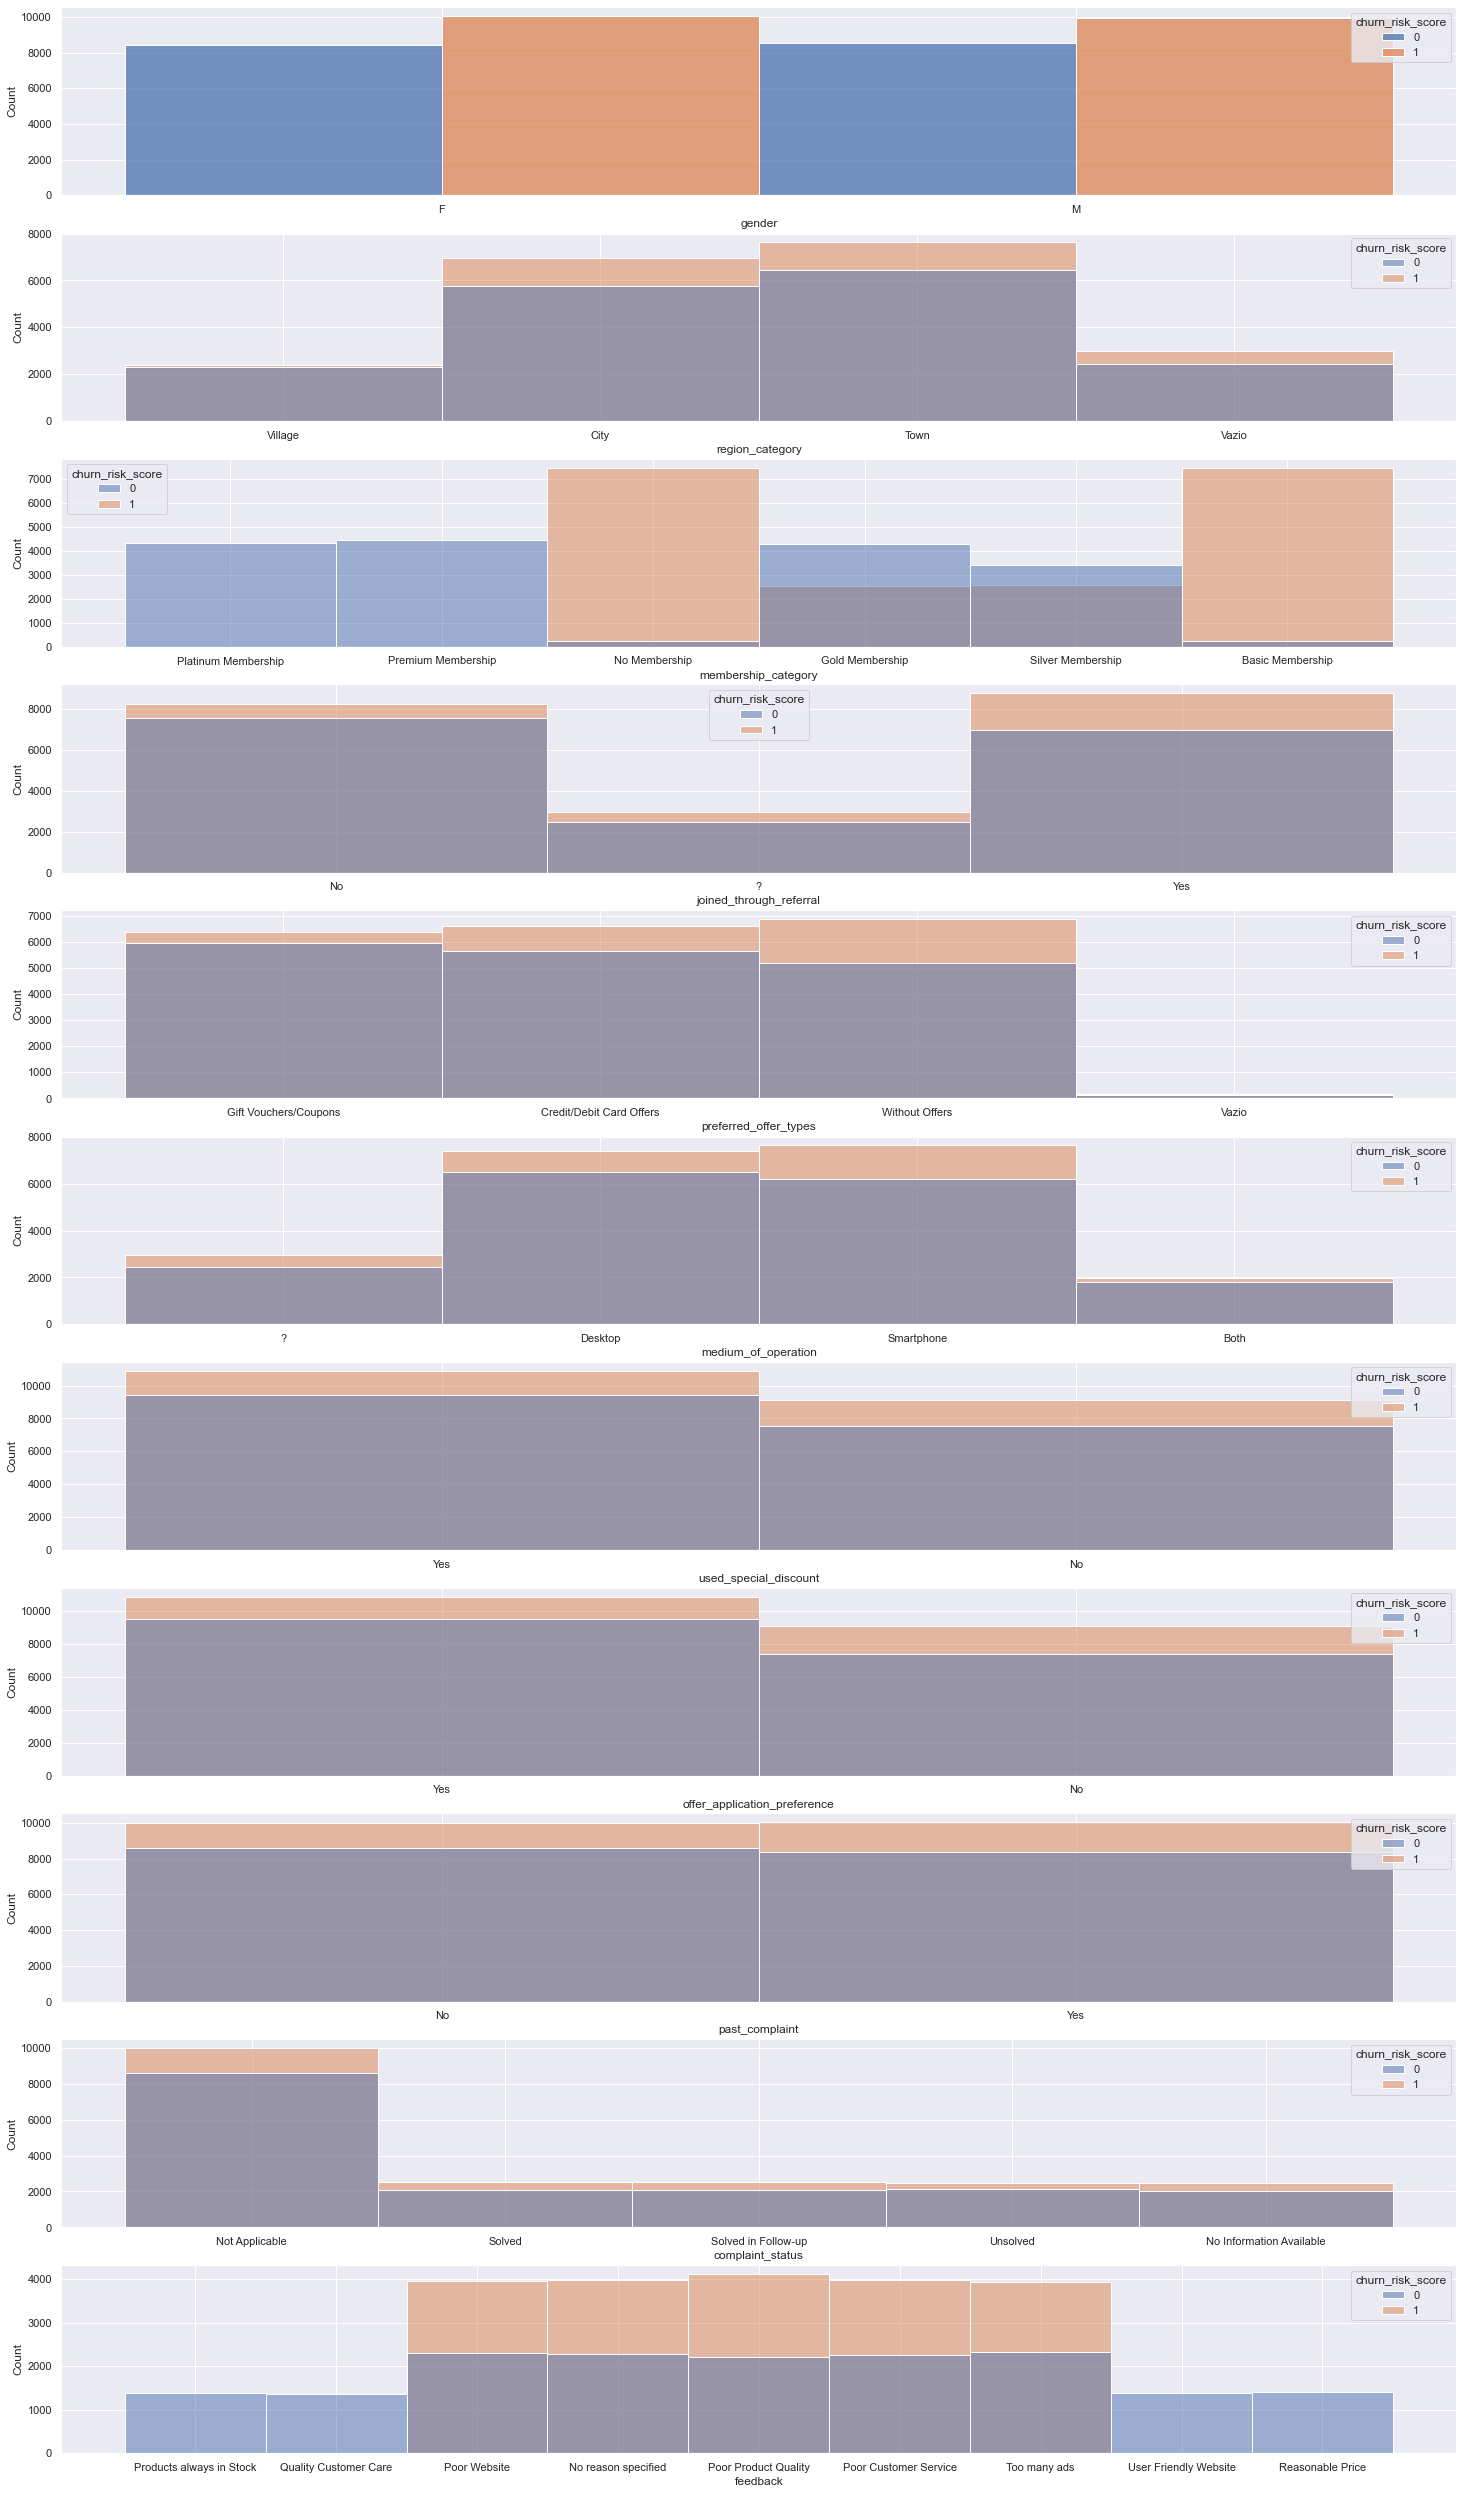

In [59]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt

#df_churn = df_churn.dropna(subset=['points_in_wallet'])
df_churn = df_churn.fillna(df_churn['points_in_wallet'].mean())

# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
df = df_churn

fig, axs = plt.subplots(11, 1, figsize=(25, 45))

sns.histplot(data=df, x="gender",color="red",hue="churn_risk_score",multiple="dodge", ax=axs[0])
sns.histplot(data=df, x="region_category",hue="churn_risk_score", color="teal", discrete=True ,ax=axs[1])
sns.histplot(data=df, x="membership_category", hue="churn_risk_score", color="teal", discrete=True,ax=axs[2])
sns.histplot(data=df, x="joined_through_referral", hue="churn_risk_score", color="teal", discrete=True,ax=axs[3])
sns.histplot(data=df, x="preferred_offer_types", hue="churn_risk_score", color="teal", discrete=True,ax=axs[4])
sns.histplot(data=df, x="medium_of_operation", hue="churn_risk_score", color="teal", discrete=True,ax=axs[5])
sns.histplot(data=df, x="used_special_discount", hue="churn_risk_score", color="teal", discrete=True,ax=axs[6])
sns.histplot(data=df, x="offer_application_preference", hue="churn_risk_score", color="teal", discrete=True,ax=axs[7])
sns.histplot(data=df, x="past_complaint", hue="churn_risk_score", color="teal", discrete=True,ax=axs[8])
sns.histplot(data=df, x="complaint_status", hue="churn_risk_score", color="teal", discrete=True,ax=axs[9])
sns.histplot(data=df, x="feedback", hue="churn_risk_score", color="teal", discrete=True,ax=axs[10])



plt.show()

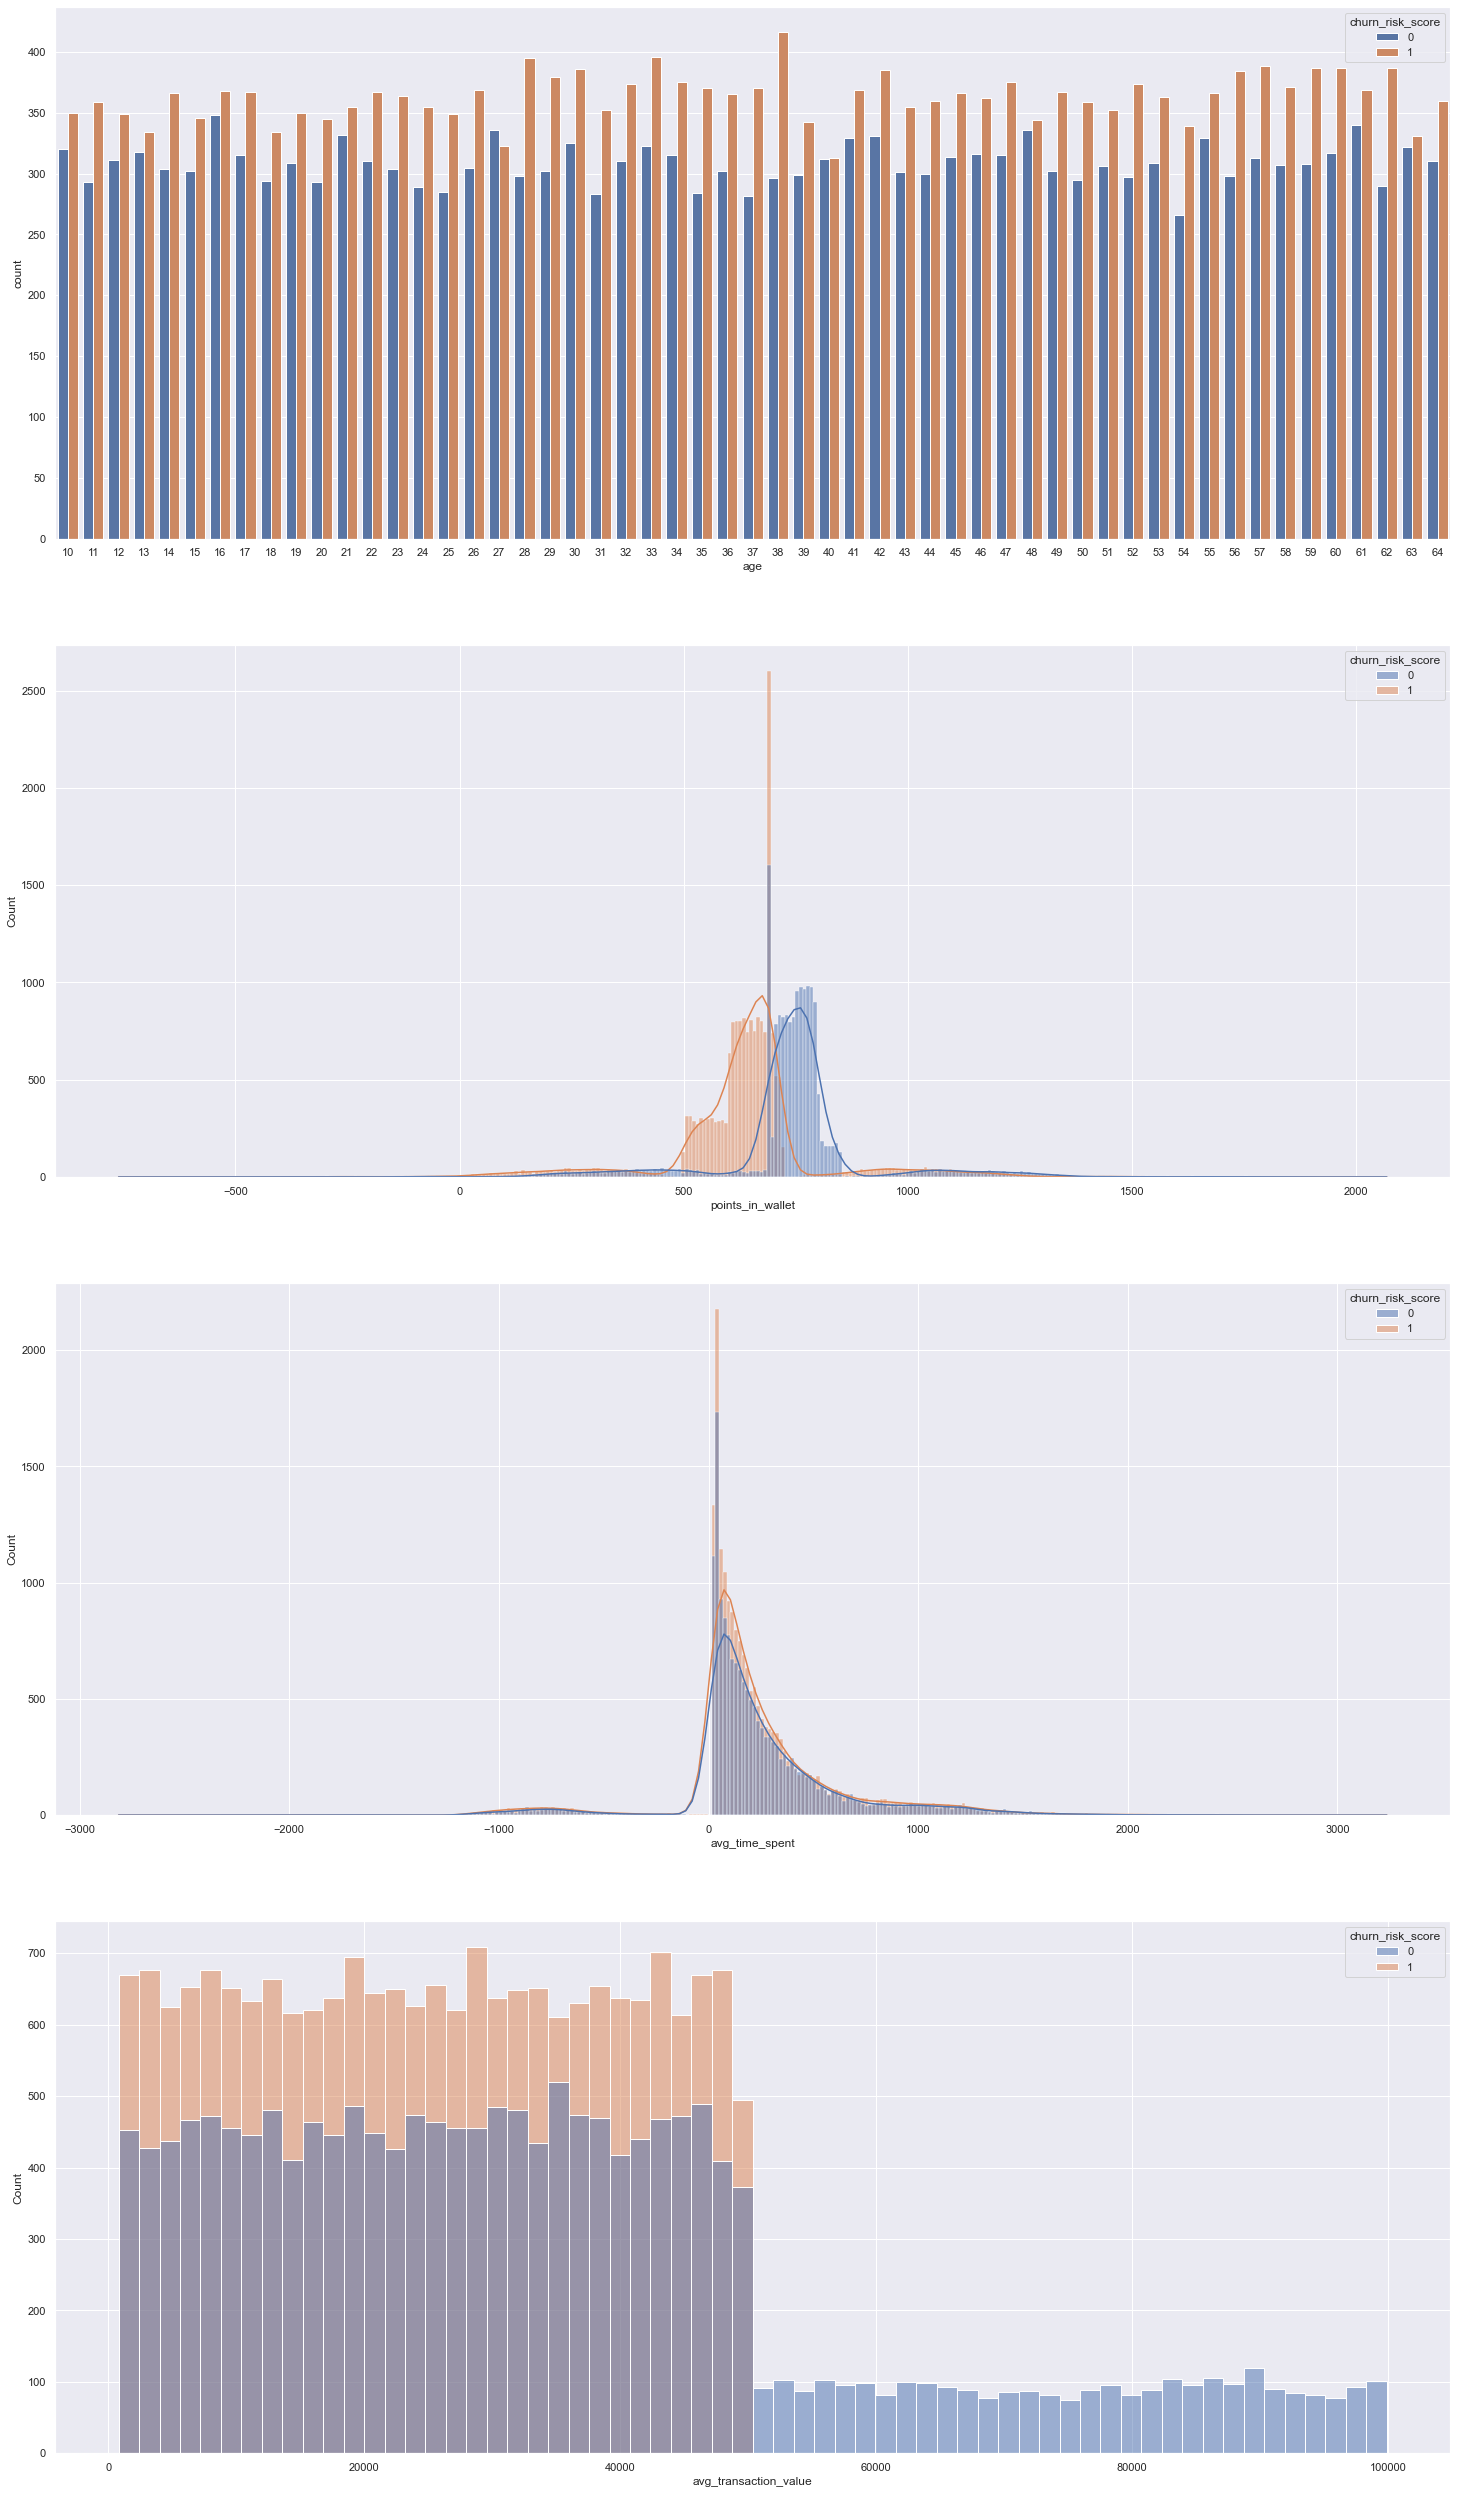

In [60]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
df = df_churn

fig, axs = plt.subplots(4, 1, figsize=(25, 45))

sns.countplot(data=df, x="age", hue="churn_risk_score", ax=axs[0])
sns.histplot(data=df, x="points_in_wallet", hue="churn_risk_score",kde=True, discrete=False,ax=axs[1])
sns.histplot(data=df, x="avg_time_spent", hue="churn_risk_score", kde=True, discrete=False,ax=axs[2])
sns.histplot(data=df, x="avg_transaction_value", hue="churn_risk_score", color="teal", discrete=False,ax=axs[3])


plt.show()

<font size="6"><div align="center"><span style="color:blue">Tratando dados</span></div></font>

In [61]:
df_churn['gender']=df_churn['gender'].map({'F':1,
                             'M':0},
                             na_action=None)

df_churn['joined_through_referral']=df_churn['joined_through_referral'].map({'Yes':1,
                             'No':0},
                             na_action=None)


df_churn['used_special_discount']=df_churn['used_special_discount'].map({'Yes':1,
                             'No':0},
                             na_action=None)

df_churn['offer_application_preference']=df_churn['offer_application_preference'].map({'Yes':1,
                             'No':0},
                             na_action=None)

df_churn['past_complaint']=df_churn['past_complaint'].map({'Yes':1,
                             'No':0},
                             na_action=None)

categoria_idade = pandas.cut(df_churn.age,bins=[0,17,25,35,40,60,200],
                                labels=['Criança','Adulto inicial',
                                        'Adulto pleno','Adulto final',
                                        'Meia-idade','Idoso'])
df_churn.insert(2,'age_group',categoria_idade)

df_churn['feedback']=df_churn['feedback'].map({'Products always in Stock':1,
                             'User Friendly Website':1,'Reasonable Price':1,'Quality Customer Care':1,
                             'Poor Product Quality':0,'Poor Website':0,'No reason specified':0,'Too many ads':0,
                             'Poor Customer Service':0},
                             na_action=None)

df_churn['membership_category']=df_churn['membership_category'].map({'Basic Membership':'Until basic',
                             'No Membership':'Until basic','Silver Membership':'Silve and Gold','Gold Membership':'Silve and Gold',
                             'Premium Membership':'Premium and Platium','Platinum Membership':'Premium and Platium'},
                             na_action=None)

In [62]:
def absolute_maximum_scale(series):
    return series / series.abs().max()

for col in df_churn.columns:
    df_churn['avg_transaction_value'] = absolute_maximum_scale(df_churn['avg_transaction_value'])
    df_churn['points_in_wallet'] = absolute_maximum_scale(df_churn['points_in_wallet'])
    df_churn['age'] = absolute_maximum_scale(df_churn['age'])
    df_churn['avg_time_spent'] = absolute_maximum_scale(df_churn['avg_time_spent'])

In [63]:
categorical_cols = ['membership_category']

for k in categorical_cols:
    if df_churn[k].dtypes == 'object':    
        df_ = df_churn[k].unique()
        p = []
    
        for i in df_:
            for j in df_churn[k]:
                if i == j:
                    p.append(1)
                else:
                    p.append(0)
            df_churn[k + " " + i] = p
            p=[]
    else:
        p = []

In [64]:
df_churn.head()

,Unnamed: 0,age,age_group,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,membership_category Premium and Platium,membership_category Until basic,membership_category Silve and Gold
0,0,0.281,Adulto inicial,1,XW0DQ7H,Village,Premium and Platium,2017-08-17,0.0,xxxxxxxx,...,0.378,1,1,0,Not Applicable,1,0,1,0,0
1,1,0.500,Adulto pleno,1,5K0N3X1,City,Premium and Platium,2017-08-28,NaN,CID21329,...,0.332,1,0,1,Solved,1,0,1,0,0
2,2,0.688,Meia-idade,1,1F2TCL3,Town,Until basic,2016-11-11,1.0,CID12313,...,0.242,0,1,1,Solved in Follow-up,0,1,0,1,0
3,3,0.578,Adulto final,0,VJGJ33N,City,Until basic,2016-10-29,1.0,CID3793,...,0.274,0,1,1,Unsolved,0,1,0,1,0
4,4,0.484,Adulto pleno,1,SVZXCWB,City,Until basic,2017-09-12,0.0,xxxxxxxx,...,0.320,0,1,1,Solved,0,1,0,1,0


In [65]:
count_nan_in_df = df_churn.isnull().sum()
print (count_nan_in_df)

Unnamed: 0                                    0
age                                           0
age_group                                     0
gender                                        0
security_no                                   0
region_category                               0
membership_category                           0
joining_date                                  0
joined_through_referral                    5428
referral_id                                   0
preferred_offer_types                         0
medium_of_operation                           0
internet_option                               0
last_visit_time                               0
days_since_last_login                         0
avg_time_spent                                0
avg_transaction_value                         0
avg_frequency_login_days                      0
points_in_wallet                              0
used_special_discount                         0
offer_application_preference            

<font size="6"><div align="center"><span style="color:blue">Treinamento dos modelos</span></div></font>

<font size="3"><div align="left"><span style="color:blue">Remover variáveis indesejadas</span></div></font>

In [66]:
df_churn=df_churn.drop(columns=['Unnamed: 0','age','gender','age_group','security_no','region_category','membership_category','complaint_status','joining_date','referral_id','avg_frequency_login_days','preferred_offer_types','used_special_discount','preferred_offer_types','medium_of_operation','internet_option','last_visit_time','days_since_last_login','complaint_status','past_complaint','avg_time_spent','offer_application_preference','joined_through_referral'])

<font size="3"><div align="left"><span style="color:blue">Remover variáveis indesejadas</span></div></font>

In [67]:
from sklearn.datasets import make_blobs
def plot_svm_margin(nsamples, ncenters, C, kernel,  random_state, margin):
    X, y = make_blobs(n_samples=nsamples, centers=ncenters, random_state=random_state)
    
    def make_meshgrid(x, y, h=.02):
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        return xx, yy
    def plot_contours(ax, clf, xx, yy, **params):
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
        return out
   
 # The classification SVC model
    model = svm.SVC(kernel=kernel, C=C)
    clf = model.fit(X, y)
    fig, ax = plt.subplots()
    # title for the plots
    title = ('Decision surface of linear SVC')
    # Set-up grid for plotting.
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")

 # plot support vectors
    ax.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    axis_lims = plt.axis()
    
    if margin and kernel == 'linear':
        # get the separating hyperplane
        xx = np.linspace(xx.min(), xx.max())
        for c in range(clf.coef_.shape[0]):
            w = clf.coef_[c]
            a = -w[0] / w[1]
            yy = a * xx - (clf.intercept_[0]) / w[1]

            # plot the parallels to the separating hyperplane that pass through the
            # support vectors (margin away from hyperplane in direction
            # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
            # 2-d.
            margin = 1 / np.sqrt(np.sum(clf.coef_[c] ** 2))
            yy_down = yy - np.sqrt(1 + a ** 2) * margin
            yy_up = yy + np.sqrt(1 + a ** 2) * margin

            # plot the line, the points, and the nearest vectors to the plane
            plt.plot(xx, yy, "k-", alpha=0.5)
            plt.plot(xx, yy_down, "k--", alpha=0.5)
            plt.plot(xx, yy_up, "k--", alpha=0.5)

    plt.axis(axis_lims)       
    plt.show()
    
    
interact(plot_svm_margin,
         nsamples = [100, 500, 1000],
         ncenters = [2, 3, 4, 5],
         C = [1e-3, 1e-2, 1e-1, 1, 1e2, 1e3],
         kernel = ['linear', 'rbf', 'poly'],
         random_state = [1,2,3,4,5,6],
         margin = True)

interactive(children=(Dropdown(description='nsamples', options=(100, 500, 1000), value=100), Dropdown(descript…

<function __main__.plot_svm_margin(nsamples, ncenters, C, kernel, random_state, margin)>

<font size="3"><div align="left"><span style="color:blue">Calculo da Acurácia dos Modelos - Reg. Logistica, Random forest e SVM </span></div></font>

In [180]:
from statsmodels.discrete import discrete_model

logit = discrete_model.Logit(ytrain, xtrain).fit()

logit.summary2()

         Current function value: 0.247843
         Iterations: 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                          Results: Logit
==================================================================================================
Model:                         Logit                       Pseudo R-squared:            0.641     
Dependent Variable:            churn_risk_score            AIC:                         14657.5517
Date:                          2022-06-07 15:45            BIC:                         14707.3139
No. Observations:              29546                       Log-Likelihood:              -7322.8   
Df Model:                      5                           LL-Null:                     -20375.   
Df Residuals:                  29540                       LLR p-value:                 0.0000    
Converged:                     0.0000                      Scale:                       1.0000    
No. Iterations:                35.0000                                                            
--------------------------------------------------------------------------------------------------
                                         Coef.    Std.Err.     z     P>|z|     [0.025     0.975]  
--------------------------------------------------------------------------------------------------
avg_transaction_value                     0.1801     0.1432   1.2581 0.2084     -0.1005     0.4608
points_in_wallet                         -4.8558     0.2610 -18.6034 0.0000     -5.3673    -4.3442
feedback                                -21.0355   910.3310  -0.0231 0.9816  -1805.2516  1763.1805
membership_category Premium and Platium -28.2948 47260.1289  -0.0006 0.9995 -92656.4453 92599.8557
membership_category Until basic           4.9713     0.1091  45.5560 0.0000      4.7574     5.1852
membership_category Silve and Gold        1.5179     0.0983  15.4375 0.0000      1.3252     1.7106
==================================================================================================

"""

In [186]:
model_map = {
    'log_l1': lm.LogisticRegression(penalty='l1', solver='liblinear'),
    'log_l2': lm.LogisticRegression(penalty='l2', solver='liblinear'),
    'log_el': lm.LogisticRegression(penalty='elasticnet',l1_ratio= 0.4, solver='saga'),
}

# solver : 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'


Y = df_churn[churn_target_col]
X = df_churn.drop(churn_target_col, axis=1)

# train/test
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X, Y, test_size=0.2)
cvfold = model_selection.StratifiedKFold(n_splits = 10, random_state = 0, shuffle=True)

df_train = xtrain.copy()
df_test = xtest.copy()
df_train['train_set'] = 1
df_test['train_set'] = 0
df_train[churn_target_col] = ytrain
df_test[churn_target_col] = ytest



# Pipeline
model_churn_lr = pipeline.Pipeline([
                                ('scaler', preprocessing.StandardScaler()),
#                                 ('scaler', preprocessing.MinMaxScaler()),
                                ('model', lm.LogisticRegression(penalty='elasticnet'
                                                                ,l1_ratio= 0.4, solver='saga'))
                               ]) 

model_churn_svm = pipeline.Pipeline([
                                ('scaler', preprocessing.StandardScaler()),
#                                 ('scaler', preprocessing.MinMaxScaler()),
                                ('model', svm.SVC())
                               ]) 


model_churn_rf = pipeline.Pipeline([
                                ('scaler', preprocessing.StandardScaler()),
#                                 ('scaler', preprocessing.MinMaxScaler()),
                                ('model', tree.DecisionTreeClassifier(criterion='entropy', max_depth = 5))
                               ]) 



model_churn_lr.fit(xtrain, ytrain)
df_train['decision_lr'] = model_churn_lr.predict(xtrain)
df_test['decision_lr']  = model_churn_lr.predict(xtest)
df_train['probability_lr'] = model_churn_lr.predict_proba(xtrain)[:,1]
df_test['probability_lr']  = model_churn_lr.predict_proba(xtest)[:,1]



model_churn_rf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 5)
model_churn_rf.fit(xtrain, ytrain)      
df_train['decision_rf'] = model_churn_rf.predict(xtrain)
df_test['decision_rf']  = model_churn_rf.predict(xtest)
df_train['probability_rf'] = model_churn_rf.predict_proba(xtrain)[:,1]
df_test['probability_rf']  = model_churn_rf.predict_proba(xtest)[:,1]


model_churn_svm = svm.SVC(kernel='linear', C=0.1, probability=True)
model_churn_svm = model_churn_svm.fit(xtrain, ytrain)


df_train['decision_svm'] = model_churn_svm.predict(xtrain)
df_test['decision_svm']  = model_churn_svm.predict(xtest)
df_train['probability_svm'] = model_churn_svm.predict_proba(xtrain)[:,1]
df_test['probability_svm']  = model_churn_svm.predict_proba(xtest)[:,1]


df_churn_lr = pandas.concat((df_train, df_test), axis=0)
df_churn_rf = pandas.concat((df_train, df_test), axis=0)
df_churn_svm = pandas.concat((df_train, df_test), axis=0)

idxlr = df_churn_lr['train_set'] == 0
idxrf = df_churn_lr['train_set'] == 0
idxsvm = df_churn_svm['train_set'] == 0

print('Logistic\t', metrics.accuracy_score(df_churn_lr[idxlr][churn_target_col],
                                           df_churn_lr[idxlr]['probability_lr']>0.5))
print('Random\t', metrics.accuracy_score(df_churn_rf[idxrf][churn_target_col],
                                           df_churn_rf[idxrf]['probability_rf']>0.5))
print('SVM\t', metrics.accuracy_score(df_churn_svm[idxsvm][churn_target_col],
                                           df_churn_svm[idxsvm]['probability_svm']>0.5))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Logistic	 0.9133613104101801
Random	 0.9262217408961689
SVM	 0.8509543793150128


In [194]:
def plot_coefs(model, class_label, target_label_map):
    fig = plt.figure(figsize=(15,4))
    
    iclass = 0
    if class_label != '':
        idx  = target_label_map.target_label==class_label
        iclass = target_label_map.loc[idx, 'target'].values[0]
    
    if len(model.coef_.shape) == 2:
        coefs = model.coef_[iclass]
    else:
        coefs = model.coef_
        
    coef_names = xtrain.columns

    idx = np.argsort(coefs)

    plt.bar(np.arange(coefs.shape[0]), coefs[idx])
    plt.xticks(np.arange(coefs.shape[0]), coef_names[idx], rotation='90')
    plt.title('Coeficientes do modelo ' + model.__class__.__name__ + ' ' + class_label)
    plt.grid()
    plt.xlim((-0.5, coefs.shape[0]-0.5))
    plt.show()
    
    
interact(plot_coefs, model = fixed(model_churn_lr.steps[1][1]), 
         class_label = fixed(''),
         target_label_map = fixed(churn_label_map))

interactive(children=(Output(),), _dom_classes=('widget-interact',))

<function __main__.plot_coefs(model, class_label, target_label_map)>

In [4]:
import graphviz
dot_data = tree.export_graphviz(model_churn_rf, 
                  feature_names= wine_feature_names, 
                  leaves_parallel = True,
                  class_names=wine_label_map.target_label.values,  
                    filled=True, rounded=True,  
                  special_characters=True,
                                rotate=True,
                   out_file=None,
                           )
graph = graphviz.Source(dot_data)
# graph.format = "png"
# graph.render("./teste")
graph

ModuleNotFoundError: No module named 'graphviz'

<font size="3"><div align="left"><span style="color:blue">Confusion Matrix - Reg. Logistica, Random forest e SVM </span></div></font>

In [189]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix as cm

cm_lr = metrics.confusion_matrix(df_test['churn_risk_score'],
                              df_test['decision_lr'])

cm_rf = metrics.confusion_matrix(df_test['churn_risk_score'],
                              df_test['decision_rf'])

cm_svm = metrics.confusion_matrix(df_test['churn_risk_score'],
                              df_test['decision_svm'])

#print(classification_report(df_test['churn_risk_score']    # List of Actual Values lr
#        , df_test['decision_lr']))

#print(classification_report(df_test['churn_risk_score']    # List of Actual Values rf
#        , df_test['decision_rf']))

#print(classification_report(df_test['churn_risk_score']    # List of Actual Values SVM
#        , df_test['decision_svm']))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      3362
           1       0.95      0.89      0.92      4025

    accuracy                           0.91      7387
   macro avg       0.91      0.92      0.91      7387
weighted avg       0.92      0.91      0.91      7387



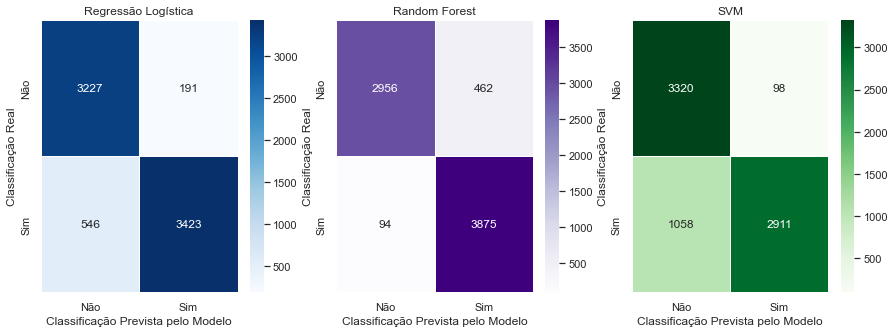

In [176]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))


sns.heatmap(cm_lr, annot=True,fmt = '.0f',linewidths=.5,cmap="Blues",ax=axs[0])

sns.heatmap(cm_rf, annot=True, fmt = '.0f',linewidths=.5,cmap="Purples",ax=axs[1])

sns.heatmap(cm_svm, annot=True, fmt = '.0f',linewidths=.5,cmap="Greens",ax=axs[2])

axs[0].set_title('Regressão Logística')
axs[1].set_title('Random Forest')
axs[2].set_title('SVM')

for i in axs:
    i.set_xlabel('Classificação Prevista pelo Modelo')
    i.set_ylabel('Classificação Real')

    i.set_xticklabels({"Não":0,"Sim":1})
    i.set_yticklabels({"Não":0,"Sim":1})



<font size="6"><div align="center"><span style="color:blue">Regressão Logística</span></div></font>

<font size="4"><div align="Left"><span style="color:blue">Treinamento do modelo
</span></div></font>

In [181]:
from sklearn import svm
from sklearn.model_selection import validation_curve
grid_search_lr = {
    'C': [0.09, 0.1, 0.15 ,0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.65,1,2.5, 3.5],
    'penalty': ['l1', 'l2', 'elasticnet', 'none']
}


def plot_parameter_validation_curve(param_name, grid_search,
                                    model, model_name, scoring,
                                    logx):
    print('Parameter:', param_name)
    print('GridSearch:', grid_search[param_name])
    print('Scoring:', scoring)
    plt.figure(figsize=(6,4))
    train_scores, test_scores = validation_curve(model,
                                                 X = xtrain, 
                                                 y = ytrain, 
                                                 param_name=param_name, 
                                                 param_range= grid_search[param_name],
                                                 scoring=scoring,
                                                 cv=cvfold,
                                                 n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.title("Curva Validação Modelo " + model_name)
    plt.xlabel(param_name)
    plt.ylabel("Score ("+scoring+")")
    if logx:
        plt.semilogx(grid_search[param_name], train_scores_mean,'-o', label="Treino",
                     color="darkorange", lw=2)
        plt.semilogx(grid_search[param_name], test_scores_mean,'-o', label="Validação-Cruzada",
                     color="navy", lw=2)
    else:
        plt.plot(grid_search[param_name], train_scores_mean,'-o', label="Treino",
                     color="darkorange", lw=2)
        plt.plot(grid_search[param_name], test_scores_mean,'-o', label="Validação-Cruzada",
                 color="navy", lw=2)
    plt.fill_between(grid_search[param_name], train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=2)
    plt.fill_between(grid_search[param_name], test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=2)
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
    
interact(plot_parameter_validation_curve,
         param_name = list(grid_search_lr.keys()), 
         grid_search = fixed(grid_search_lr),
         model = fixed(lm.LogisticRegression(solver='liblinear')),
         model_name = fixed('Regressão Logística'),
         scoring = classification_scores,
         logx = True
)

interactive(children=(Dropdown(description='param_name', options=('C', 'penalty'), value='C'), Dropdown(descri…

<function __main__.plot_parameter_validation_curve(param_name, grid_search, model, model_name, scoring, logx)>

In [184]:
grid_search_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel':['linear', 'rbf', 'poly'],
}


def plot_parameter_validation_curve(param_name, grid_search,
                                    model, model_name, scoring,
                                    logx):
    print('Parameter:', param_name)
    print('GridSearch:', grid_search[param_name])
    print('Scoring:', scoring)
    plt.figure(figsize=(6,4))
    train_scores, test_scores = validation_curve(model,
                                                 X = xtrain, 
                                                 y = ytrain, 
                                                 param_name=param_name, 
                                                 param_range= grid_search[param_name],
                                                 scoring=scoring,
                                                 cv=cvfold,
                                                 n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.title("Curva Validação Modelo " + model_name)
    plt.xlabel(param_name)
    plt.ylabel("Score ("+scoring+")")
    if logx:
        plt.semilogx(grid_search[param_name], train_scores_mean,'-o', label="Treino",
                     color="darkorange", lw=2)
        plt.semilogx(grid_search[param_name], test_scores_mean,'-o', label="Validação-Cruzada",
                     color="navy", lw=2)
    else:
        plt.plot(grid_search[param_name], train_scores_mean,'-o', label="Treino",
                     color="darkorange", lw=2)
        plt.plot(grid_search[param_name], test_scores_mean,'-o', label="Validação-Cruzada",
                 color="navy", lw=2)
    plt.fill_between(grid_search[param_name], train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=2)
    plt.fill_between(grid_search[param_name], test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=2)
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
    
    
#     
model_wine = svm.SVC(kernel='linear', C=0.1, probability=True)
    
    
interact(plot_parameter_validation_curve,
         param_name = list(grid_search_lr.keys()), 
         grid_search = fixed(grid_search_lr),
         model = fixed(svm.SVC()),
         model_name = fixed('SVM'),
         scoring = classification_scores,
         logx = True
)

interactive(children=(Dropdown(description='param_name', options=('C', 'kernel'), value='C'), Dropdown(descrip…

<function __main__.plot_parameter_validation_curve(param_name, grid_search, model, model_name, scoring, logx)>